# ME 3613 & Homework 3

- Name: Andrew Trepagnier
- Netid: alt658

In [6]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Path to the maroon_ipynb file most likely follows one the two shown here

# plt.style.use('maroon_ipynb.mplstyle')

# Problem 1
## Given

![jupyter](./f1.PNG)

$$m=10\ kg$$

$$k_1=85\ N/m,\ k_2=30\ N/m$$

$$c_1=4\ N\cdot s/m,\ c_2=3\ N\cdot s/m$$

The input force $f(t) = e^{-5t}$.

## Find
Using the control package `tf()` function to get the forced response, find the following:

a. The equation of motion for the system.
b. The transfer function $X(s)/F(s)$.
c. The forced response for the input force $f(t)$. Plot the response.

## Solution
### Part A

In [10]:
# Define symbols using sympy
t = sp.Symbol('t')
m = sp.Symbol('m')
k_1 = sp.Symbol('k_1')
k_2 = sp.Symbol('k_2')
c_1 = sp.Symbol('c_1')
c_2 = sp.Symbol('c_2')
x = sp.Function('x')
f = sp.Function('f')

#m , k_1 , k_2, c_1, c_2 = 10, 85, 30, 4, 3

# Set force equations for the mass-spring system using sp.diff functions
# Dampeners and springs always resist the direction of motion so they are negative in this instance 

eq = sp.Eq(m*x(t).diff(t,2)+(c_1+c_2)*x(t).diff()+(k_1+k_2)*x(t), f(t))
eq


Eq(m*Derivative(x(t), (t, 2)) + (c_1 + c_2)*Derivative(x(t), t) + (k_1 + k_2)*x(t), f(t))

In [3]:
# substitute values into equation


eq_1 = sp.Eq(10*x(t).diff(t,2)+(4+3)*x(t).diff()+(85+30)*x(t), f(t))
eq_1


Eq(115*x(t) + 7*Derivative(x(t), t) + 10*Derivative(x(t), (t, 2)), f(t))

### This Equation is equivalent to the following equation

$$10\ddot{x}+(7)\dot{x}+(115)x = f$$

Apply the Transfer function to find force response of the system. The transfer function is defined as the ratio of the forced response $X(s)$ to the input $F(s)$ in the s-domain, which is 
For any transfer function for 2nd-order ODEs
$$T(s)=\frac{X(s)}{F(s)}=\frac{as^2+bs+c}{ds^2+es+f}$$
it can be represented as `tf([a, b, c],[d, e, f])`.

### Part B

In [4]:
t, s = sp.symbols('t, s')


eq1_s = sp.Eq(
    sp.laplace_transform(eq_1.lhs, t, s, noconds=True),  # Laplace transfer for the left hand side of the above equation
    sp.laplace_transform(eq_1.rhs, t, s, noconds=True)   # Laplace transfer for the right hand side of the above equation
)
eq1_s

Eq(10*s**2*LaplaceTransform(x(t), t, s) + 7*s*LaplaceTransform(x(t), t, s) - 10*s*x(0) + 115*LaplaceTransform(x(t), t, s) - 7*x(0) - 10*Subs(Derivative(x(t), t), t, 0), LaplaceTransform(f(t), t, s))

In [5]:
# Substitute zeros into laplace. t = 0, make sure you define x function's independent variable either here or as sp.Function('x')(t)
# Additional note to self, x is declared as a function with an independednt variable t, which is a numpy array. You must declare what the independent variable is either here, x(t)
# or at the callout, x = sp.Function('x')(t) like this

eq2_s = eq1_s.subs([
    (x(t).subs(t, 0),0),
    (x(t).diff().subs(t, 0),0)
]
)
eq2_s

Eq(10*s**2*LaplaceTransform(x(t), t, s) + 7*s*LaplaceTransform(x(t), t, s) + 115*LaplaceTransform(x(t), t, s), LaplaceTransform(f(t), t, s))

In [8]:
# Solve and find solution in the s domain
x1_s = sp.solve(eq1_s, sp.laplace_transform(x, t, s, noconds=True))
x1_s

[(10*s*x(0) + LaplaceTransform(f(t), t, s) + 7*x(0) + 10*Subs(Derivative(x(t), t), t, 0))/(10*s**2 + 7*s + 115)]

### Solution to part B: Transfer funciton

In [9]:
T1 = ct.tf(1, [10, 7, 115])
T1


TransferFunction(array([1]), array([ 10,   7, 115]))

### Part C

In [11]:
# define time range
time_array = np.linspace(0,40,1000)

In [12]:
# implement control package to see response, e^-5t, where t is the input of values and we watch the transfer funcitons response

time_array, x1 = ct.forced_response(T1, T = time_array, U = np.exp(-5*time_array) )

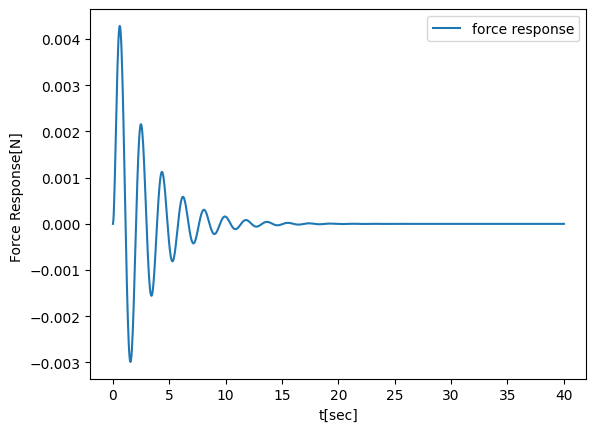

In [19]:
# plot it
fig, ax = plt.subplots()


ax.plot(time_array,x1,label='force response')

ax.set_xlabel('t[sec]')
ax.set_ylabel('Force Response[N] ')
ax.legend(loc='upper right')
plt.show()

# Problem 2
## Given

![jupyter](./f2.PNG)

$$m_1=5\ kg,\ m_2=10\ kg$$

$$k_1=85\ N/m,\ k_2=30\ N/m,\ k_3=500\ N/m$$

$$c_1=4\ N\cdot s/m,\ c_2=3\ N\cdot s/m$$

$$f(t)=10^{-t}$$

The initial conditions are $x_0(0)=0.5$, $\dot{x_0}(0)=0$, $x_1(0)=0$, $\dot{x_1}(0)=0$.

## Find
- a. Determine the equations of motion.
- b. Put the system in the state-variable form. Tip: use `subs` function to make substitutions $x_1=x$ and $x_2=\dot{x}$.
- c. Define a state-space model using `ct.ss`.
- d. Plot the response $x_0(t)$ and $x_1(t)$ (first 10 seconds) on the same plot using the `ct.forced_response` function and label each response. 

## Solution
### Part A

In [ ]:
# Deformations based on FBDs

# the deformation in spring x_0 = x_0
# the deformation in the spring x_1 = x_1-x_0

m1 = sp.Symbol('m1')
m2 = sp.Symbol('m2')
x0 = sp.Symbol('x0')
x1 = sp.Symbol('x1')
k1 = sp.Symbol('k1')
k2 = sp.Symbol('k2')
k3 = sp.Symbol('k3')
c1 = sp.Symbol('c1')
c2 = sp.Symbol('c2')



### Mass 1 FBD


$$\sum F = m_{1}\ddot{x_{0}} = -k_{1}x_{0}-c_{1}\dot{x_{0}}-k_{3}(x_{1}-x_{0})$$


### Mass 2 FBD

$$\sum F = m_{2}\ddot{x_{1}} = -k_{3}(x_{1}-x_{0})-c_{2}\dot{x_{1}}-k_{2}(x_{1}) + f$$

### Part B

### Part C

### Part D